<a href="https://colab.research.google.com/github/mageshkkumarrv/DataScience/blob/main/SalesProjectAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project_Name:** Sales Data Analysis




**Requirement:**  Analyse the given data properly and find out who is spending more money to do shopping in case of Gender, Age_Group, Maritial_Status, State, Occupation, On_Which_Product_Category

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# https://github.com/Jeevita-R/data_analysis_project
df = pd.read_csv('sales_data.csv',encoding='ISO-8859-1')
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
# Checking No.of Rows and Columns
df.shape

(11251, 15)

In [6]:
#Checking Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [7]:
# Dropping Status and Unnamed1 Col since they have only NaN
df.drop(['Status','unnamed1'],axis=1,inplace=True)
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [8]:
# Dropping records having NaN in Amount Column
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11239 non-null  int64  
 1   Cust_name         11239 non-null  object 
 2   Product_ID        11239 non-null  object 
 3   Gender            11239 non-null  object 
 4   Age Group         11239 non-null  object 
 5   Age               11239 non-null  int64  
 6   Marital_Status    11239 non-null  int64  
 7   State             11239 non-null  object 
 8   Zone              11239 non-null  object 
 9   Occupation        11239 non-null  object 
 10  Product_Category  11239 non-null  object 
 11  Orders            11239 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB


In [9]:
# Changing the M - Male and F - Female
d={'M':'Male','F':'Female'}
df['Gender']=df['Gender'].map(d)
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,Female,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,Female,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,Female,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,Male,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,Male,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [10]:
#Changing 0 to Unmarried and 1 to Married
df['Marital_Status']=df['Marital_Status'].map({0:'Unmarried',1:'Married'})
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,Female,26-35,28,Unmarried,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,Female,26-35,35,Married,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,Female,26-35,35,Married,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,Male,0-17,16,Unmarried,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,Male,26-35,28,Married,Gujarat,Western,Food Processing,Auto,2,23877.0


In [11]:
#Dropping Age Column since we have Age_Group Column(Since Age_Group is mentioned in Requirement)
df.drop('Age',inplace=True,axis=1)
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,Female,26-35,Unmarried,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,Female,26-35,Married,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,Female,26-35,Married,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,Male,0-17,Unmarried,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,Male,26-35,Married,Gujarat,Western,Food Processing,Auto,2,23877.0


**Cleaned Data**

In [12]:
# Cleaned Data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11239 non-null  int64  
 1   Cust_name         11239 non-null  object 
 2   Product_ID        11239 non-null  object 
 3   Gender            11239 non-null  object 
 4   Age Group         11239 non-null  object 
 5   Marital_Status    11239 non-null  object 
 6   State             11239 non-null  object 
 7   Zone              11239 non-null  object 
 8   Occupation        11239 non-null  object 
 9   Product_Category  11239 non-null  object 
 10  Orders            11239 non-null  int64  
 11  Amount            11239 non-null  float64
dtypes: float64(1), int64(2), object(9)
memory usage: 1.1+ MB


In [13]:
df[df['Amount']==max(df['Amount'])]
# df['Amount'].min()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,Female,26-35,Unmarried,Maharashtra,Western,Healthcare,Auto,1,23952.0


# **Data Analysis**

# **Gender**

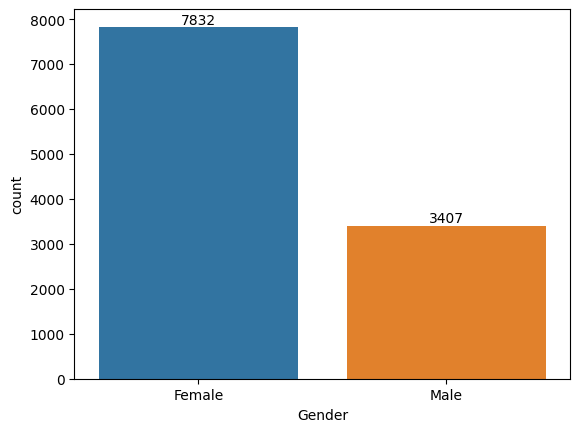

In [26]:
# Counts based on Gender
a = sns.countplot(x='Gender',data=df, hue='Gender')
for i in a.containers:
  a.bar_label(i)

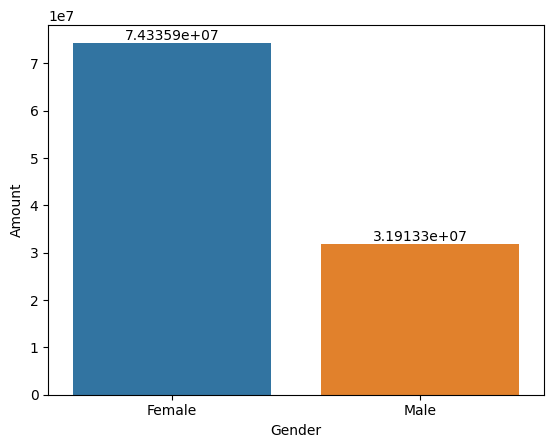

In [15]:
b = df.groupby('Gender')['Amount'].sum()
b = pd.DataFrame(b)
a = sns.barplot(x='Gender',y='Amount',data=b, hue='Gender')
for i in a.containers:
  a.bar_label(i)

**Conclusion 1:** Based on the above analysis of **Gender**, Female spend more amount on shopping.

# **Age Group**

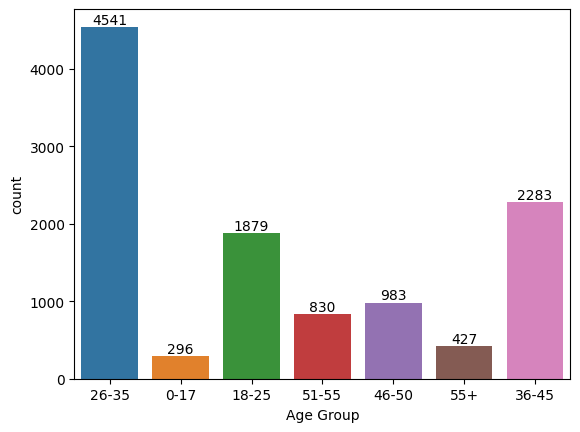

In [16]:
# Counts based on Age_Group
a = sns.countplot(x='Age Group',data=df, hue='Age Group')
for i in a.containers:
  a.bar_label(i)

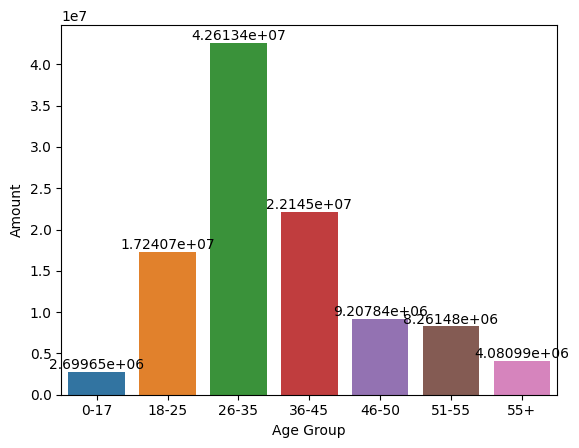

In [17]:
b = df.groupby('Age Group')['Amount'].sum()
b = pd.DataFrame(b)
a = sns.barplot(x='Age Group',y='Amount',data=b,hue='Age Group')
for i in a.containers:
  a.bar_label(i)

**Conclusion 2 (Age Group):** Based on the above analysis of Age_Group, peoples of Age_Group **26-35** spent more amount on shopping.

# **Marital Status**

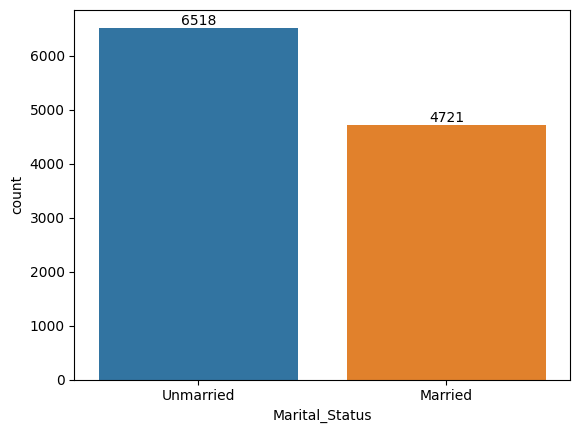

In [27]:
# Count based on Marital Status
a = sns.countplot(x='Marital_Status',data=df, hue='Marital_Status')
for i in a.containers:
  a.bar_label(i)

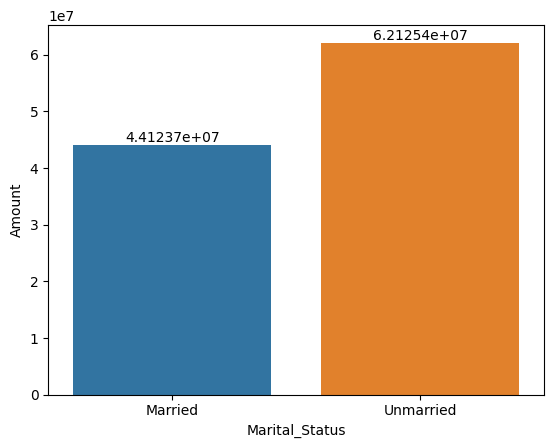

In [19]:
b = df.groupby('Marital_Status')['Amount'].sum()
b = pd.DataFrame(b)
a = sns.barplot(x='Marital_Status',y='Amount',data=b,hue='Marital_Status')
for i in a.containers:
  a.bar_label(i)

**Conslusion 3 (Marital Status)** : Based on the above analysis, based on Marital Status, **Unmarried** spent more amount on shopping.

# **State**

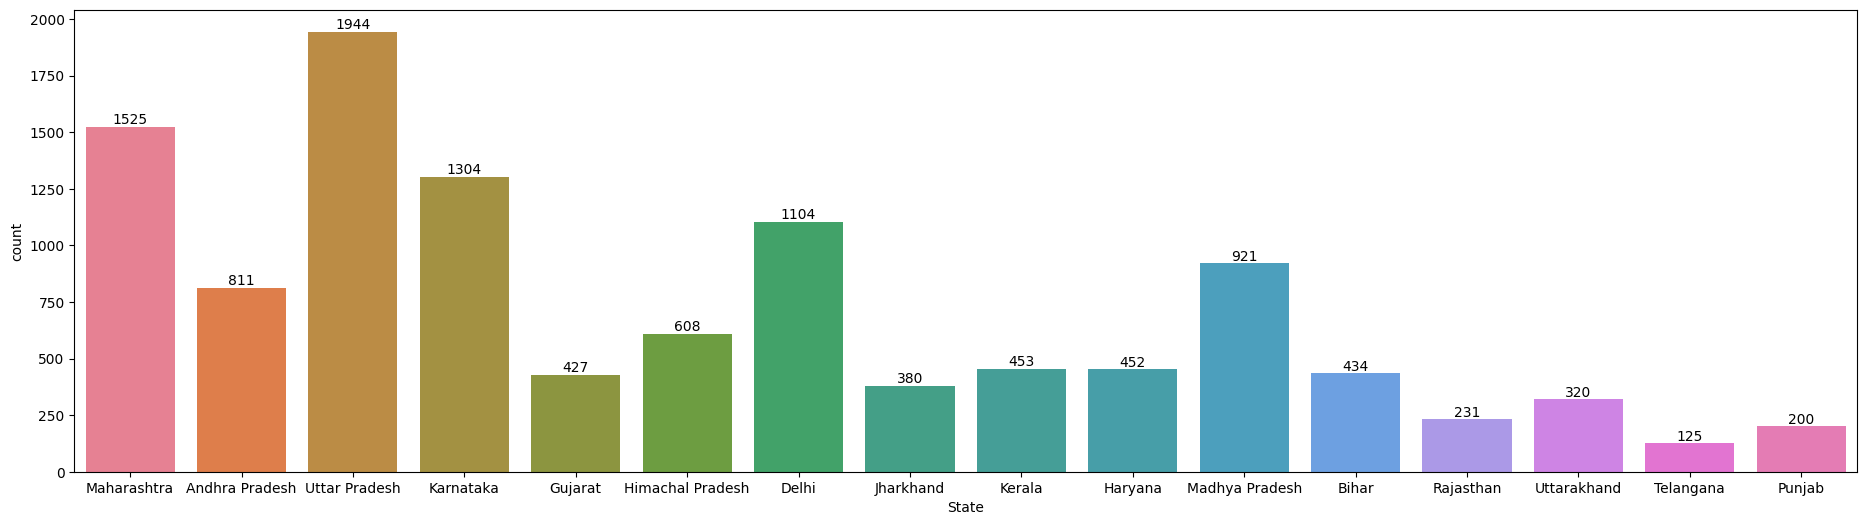

In [20]:
# Counts based on State
plt.figure(figsize=(23,6))
a = sns.countplot(x='State',data=df,hue='State')
for i in a.containers:
  a.bar_label(i)

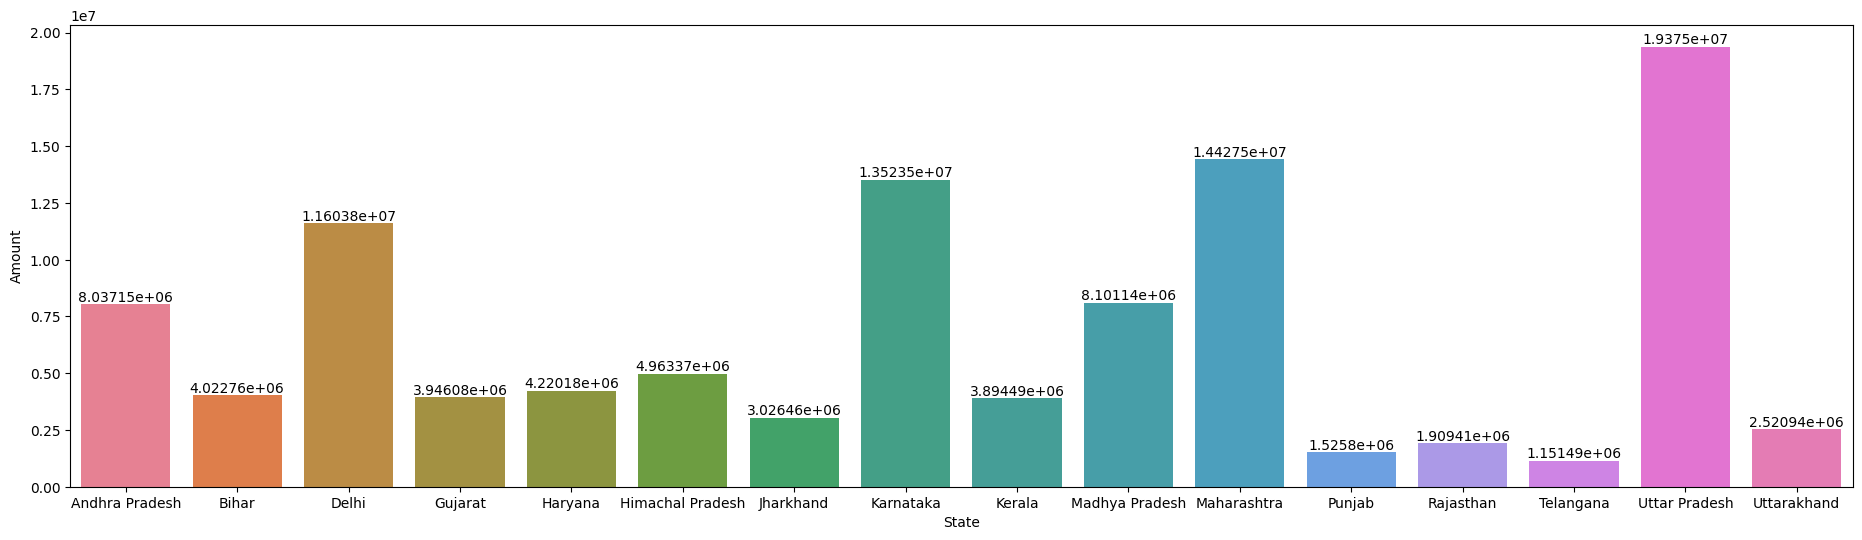

In [21]:
# Amount Spent
b = df.groupby('State')['Amount'].sum()
b = pd.DataFrame(b)
plt.figure(figsize=(23,6))
a = sns.barplot(x='State',y='Amount',data=b, hue='State')
for i in a.containers:
  a.bar_label(i)

**Conclusion 3 (Based on State):** With Respect to the above analysis, its found that Peoples from **Uttar Pradesh** has spent more on shopping.

# **Based on Occupation**

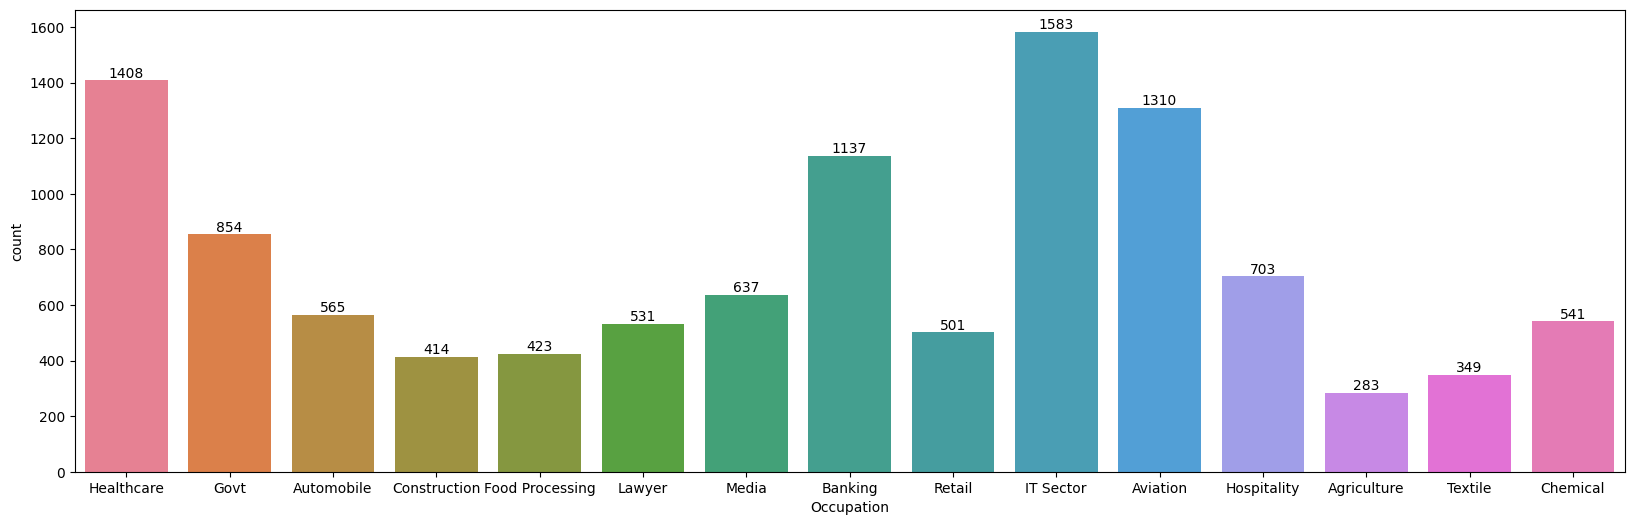

In [22]:
# Counts based on Occupation
plt.figure(figsize=(20,6))
a = sns.countplot(x='Occupation',data=df,hue='Occupation')
for i in a.containers:
  a.bar_label(i)

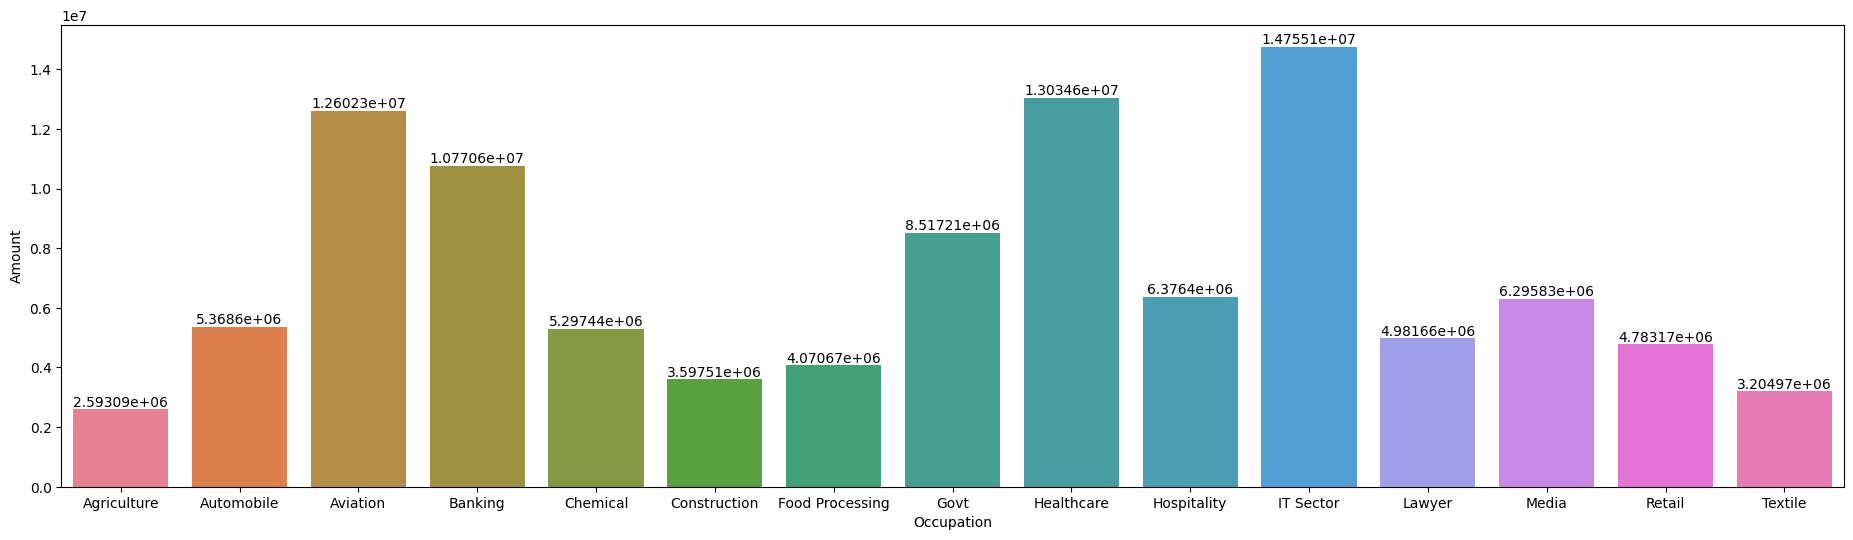

In [23]:
# Amount Spent
b = df.groupby('Occupation')['Amount'].sum()
b = pd.DataFrame(b)
plt.figure(figsize=(23,6))
a = sns.barplot(x='Occupation',y='Amount',data=b, hue='Occupation')
for i in a.containers:
  a.bar_label(i)

**Conclusion 4 (Based on Occupation):** With Respect to the above analysis, its found that Peoples from **IT Sector** had spent more on shopping.

# **Product Category**

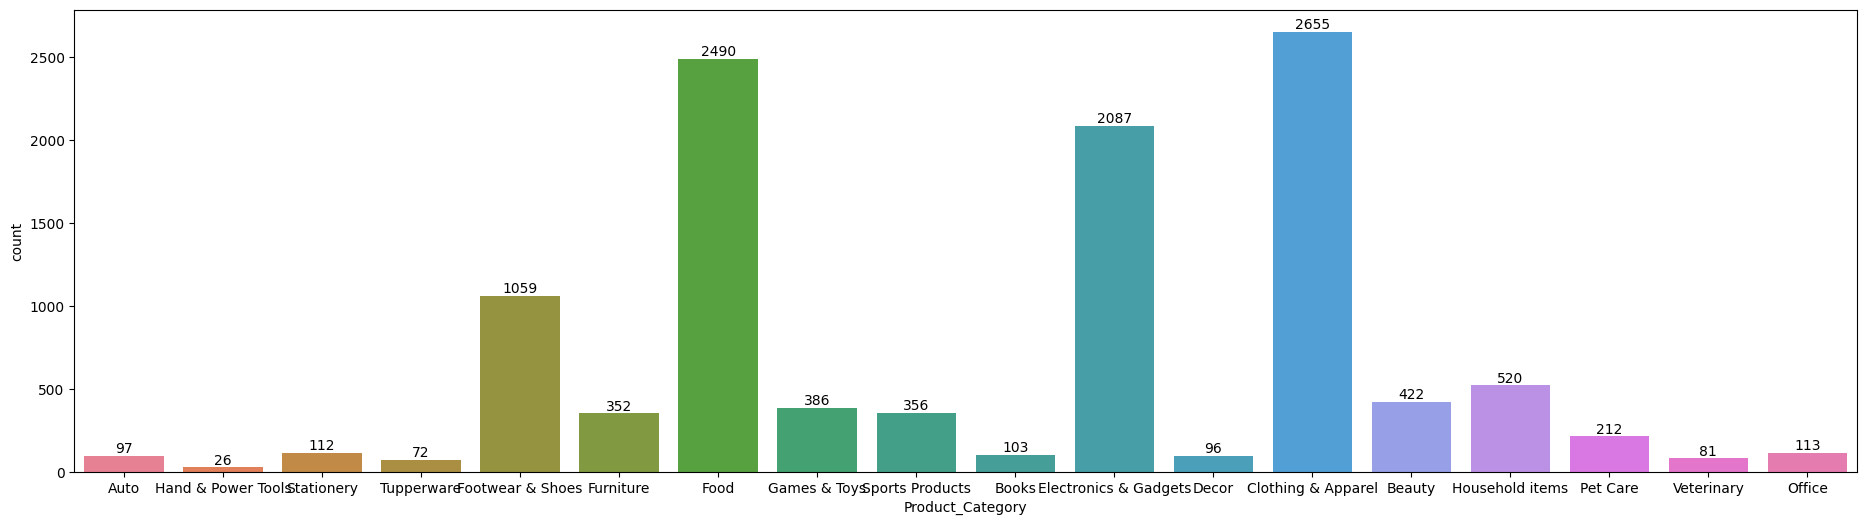

In [24]:
# Counts based on Product Category
plt.figure(figsize=(23,6))
a = sns.countplot(x='Product_Category',data=df,hue='Product_Category')
for i in a.containers:
  a.bar_label(i)

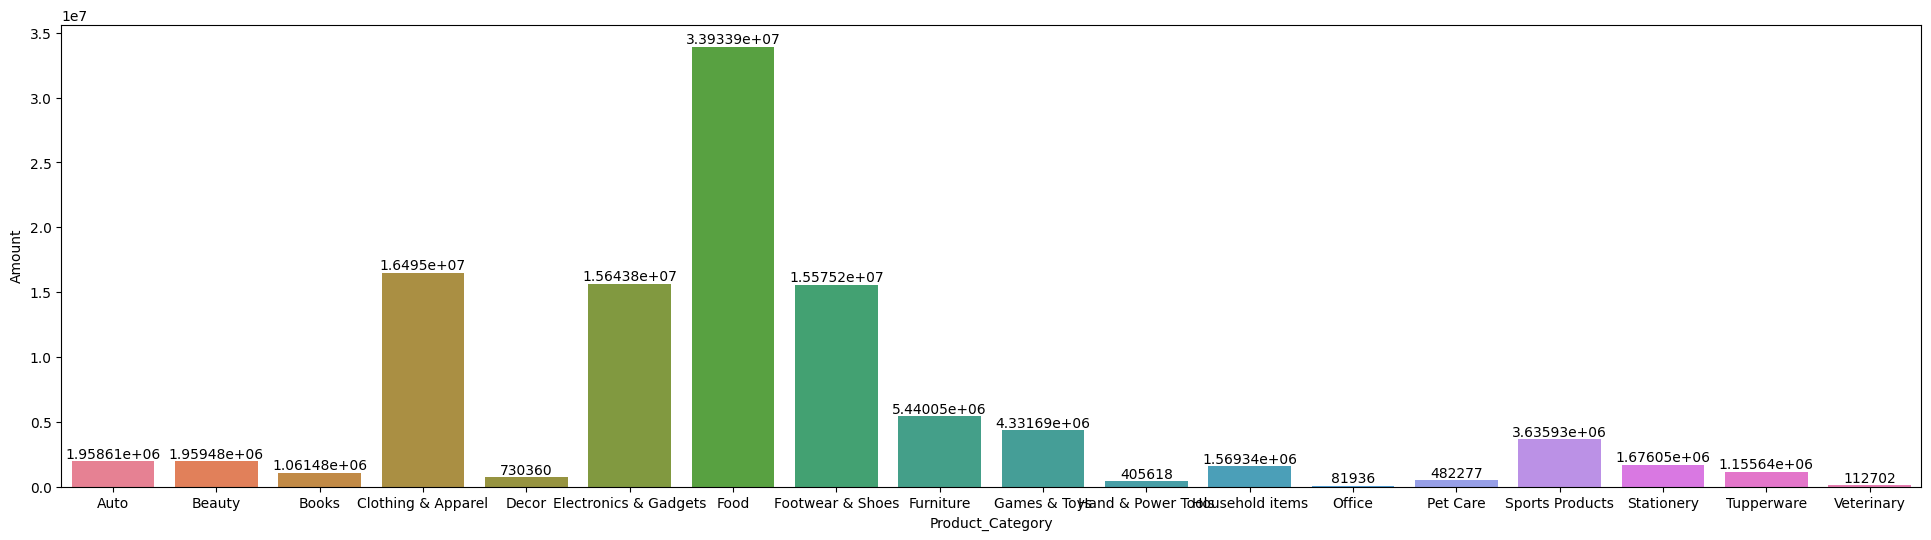

In [25]:
# Amount Spent
b = df.groupby('Product_Category')['Amount'].sum()
b = pd.DataFrame(b)
plt.figure(figsize=(24,6))
a = sns.barplot(x='Product_Category',y='Amount',data=b, hue='Product_Category')
for i in a.containers:
  a.bar_label(i)

**Conclusion 5 (Based on Product Category):** With Respect to the above analysis, its found that Peoples had spent more on **Food** shopping.

**FINAL CONCLUSION:
BASED ON THE ABOVE ANALYSIS I CAN CONCLUDE THAT UNMARRIED FEMALES WITH AGE GROUP OF 26-35 YRS WORKING IN IT SECTOR, HEALTH CARE AND AVIATION FROM UTTAR PRADESH, MAHARASTRA, KARNATAKA ARE SPENDING MORE MONEY ON FOOD ITEMS, ELECTRONIC GADGETS AND CLOTHING**